In [81]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
%matplotlib inline

In [82]:
#load the data set
data_path = '../restaurant_data/restaurants_data.csv'
df = pd.read_csv(data_path)
df.head()

,name,rating,lat,lng,vicinity,price_level,types,user_ratings_total
0,Jersey Mike's Subs,4.4,38.010347,-78.498799,"265 Merchant Walk Avenue Suite 1004, Charlotte...",1.0,"meal_takeaway, restaurant, food, point_of_inte...",683.0
1,Panera Bread,3.7,38.011409,-78.498387,"405 Merchant Walk Square Bldg 1800, Charlottes...",2.0,"cafe, bakery, meal_takeaway, restaurant, food,...",453.0
2,Timberwood Tap House,4.2,38.010356,-78.499736,"245 Merchant Walk Avenue Unit 100, Charlottesv...",2.0,"restaurant, food, point_of_interest, establish...",1359.0
3,Alamo Drafthouse Cinema Charlottesville,4.5,38.011919,-78.499495,"375 Merchant Walk Square, Charlottesville",NaN,"movie_theater, bar, restaurant, food, point_of...",2317.0
4,Subway,3.8,38.012863,-78.503421,"1141 5th Street Ext, Unit 1141, Charlottesville",1.0,"meal_takeaway, restaurant, food, point_of_inte...",86.0


### Cleaning the data

In [83]:
#check for dup, neccesary because we use special method to get the dataset
df = df.drop_duplicates(subset=['name'],keep= 'first')

In [84]:
##droping unnessary colums
df.drop(['lat'], axis=1, inplace=True)
df.drop(['lng'], axis=1, inplace=True)

In [85]:
df.drop(['vicinity'], axis=1, inplace = True)
df.head()

,name,rating,price_level,types,user_ratings_total
0,Jersey Mike's Subs,4.4,1.0,"meal_takeaway, restaurant, food, point_of_inte...",683.0
1,Panera Bread,3.7,2.0,"cafe, bakery, meal_takeaway, restaurant, food,...",453.0
2,Timberwood Tap House,4.2,2.0,"restaurant, food, point_of_interest, establish...",1359.0
3,Alamo Drafthouse Cinema Charlottesville,4.5,NaN,"movie_theater, bar, restaurant, food, point_of...",2317.0
4,Subway,3.8,1.0,"meal_takeaway, restaurant, food, point_of_inte...",86.0


In [86]:
## check null
df.isnull().sum()

name                   0
rating                 2
price_level           14
types                  0
user_ratings_total     2
dtype: int64

In [87]:
##using the mean to fill in the null
df['rating'].fillna(df['rating'].mean(), inplace=True)
df.isnull().sum()

C:\Users\eddie\AppData\Local\Temp\ipykernel_9676\1738229465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)


name                   0
rating                 0
price_level           14
types                  0
user_ratings_total     2
dtype: int64

In [88]:
##using the mean to fill in the null
df['price_level'].fillna(df['price_level'].mean(), inplace=True)
df.isnull().sum()

C:\Users\eddie\AppData\Local\Temp\ipykernel_9676\2564389370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_level'].fillna(df['price_level'].mean(), inplace=True)


name                  0
rating                0
price_level           0
types                 0
user_ratings_total    2
dtype: int64

In [89]:
##using the mean to fill in the null
df['user_ratings_total'].fillna(0, inplace=True)
df.isnull().sum()

C:\Users\eddie\AppData\Local\Temp\ipykernel_9676\3800446378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_ratings_total'].fillna(0, inplace=True)


name                  0
rating                0
price_level           0
types                 0
user_ratings_total    0
dtype: int64

In [90]:
new_df = df
new_df.head()
new_df.to_csv('c.csv',index=False)

In [91]:
# Split the 'types' column into lists
df['types'] = df['types'].str.split(', ')

In [92]:
# One-Hot Encode the 'types' column
mlb = MultiLabelBinarizer()
types_encoded = mlb.fit_transform(df['types'])
types_df = pd.DataFrame(types_encoded, columns=mlb.classes_)

# Concatenate the encoded types with the original DataFrame
df = df.reset_index(drop=True)
types_df = types_df.reset_index(drop=True)
df_processed = pd.concat([df.drop(['name', 'types'], axis=1), types_df], axis=1)

In [93]:
df= df_processed

In [94]:
df.to_csv('c.csv',index=False)

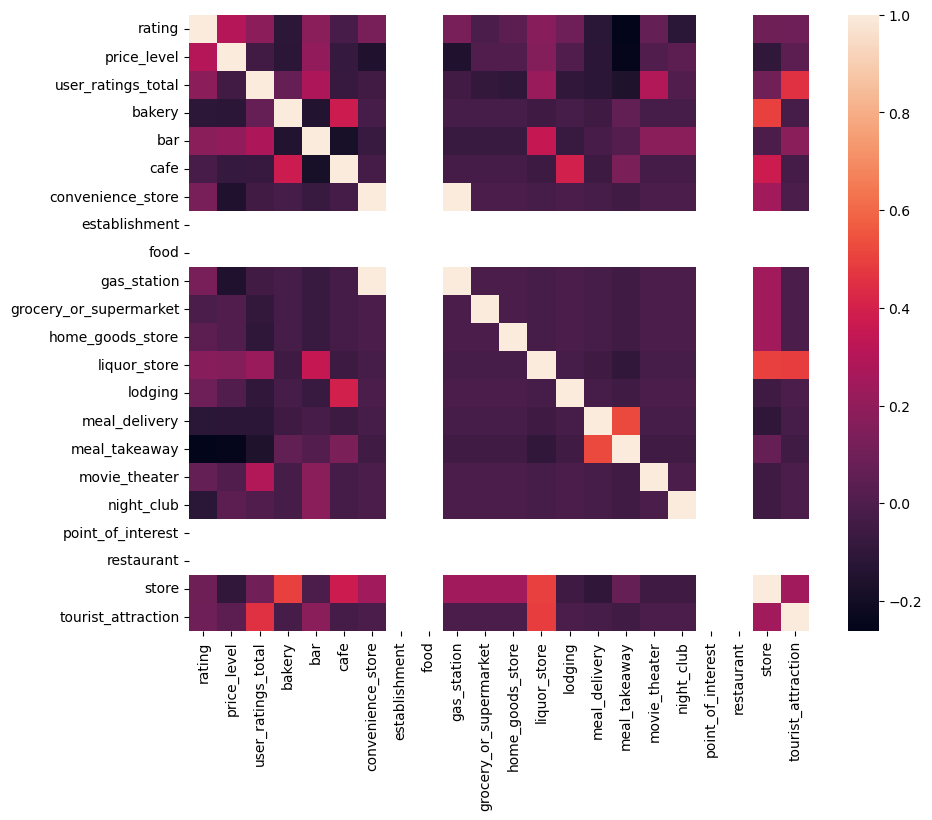

In [95]:
## visualizing feature's corr
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.show()

In [96]:
#looking at the graph convient store and gas stationa are extremly correlated

# Compute the correlation matrix
corr_matrix = df.corr().abs()
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.90:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

df_reduced = df.drop(columns=to_drop)


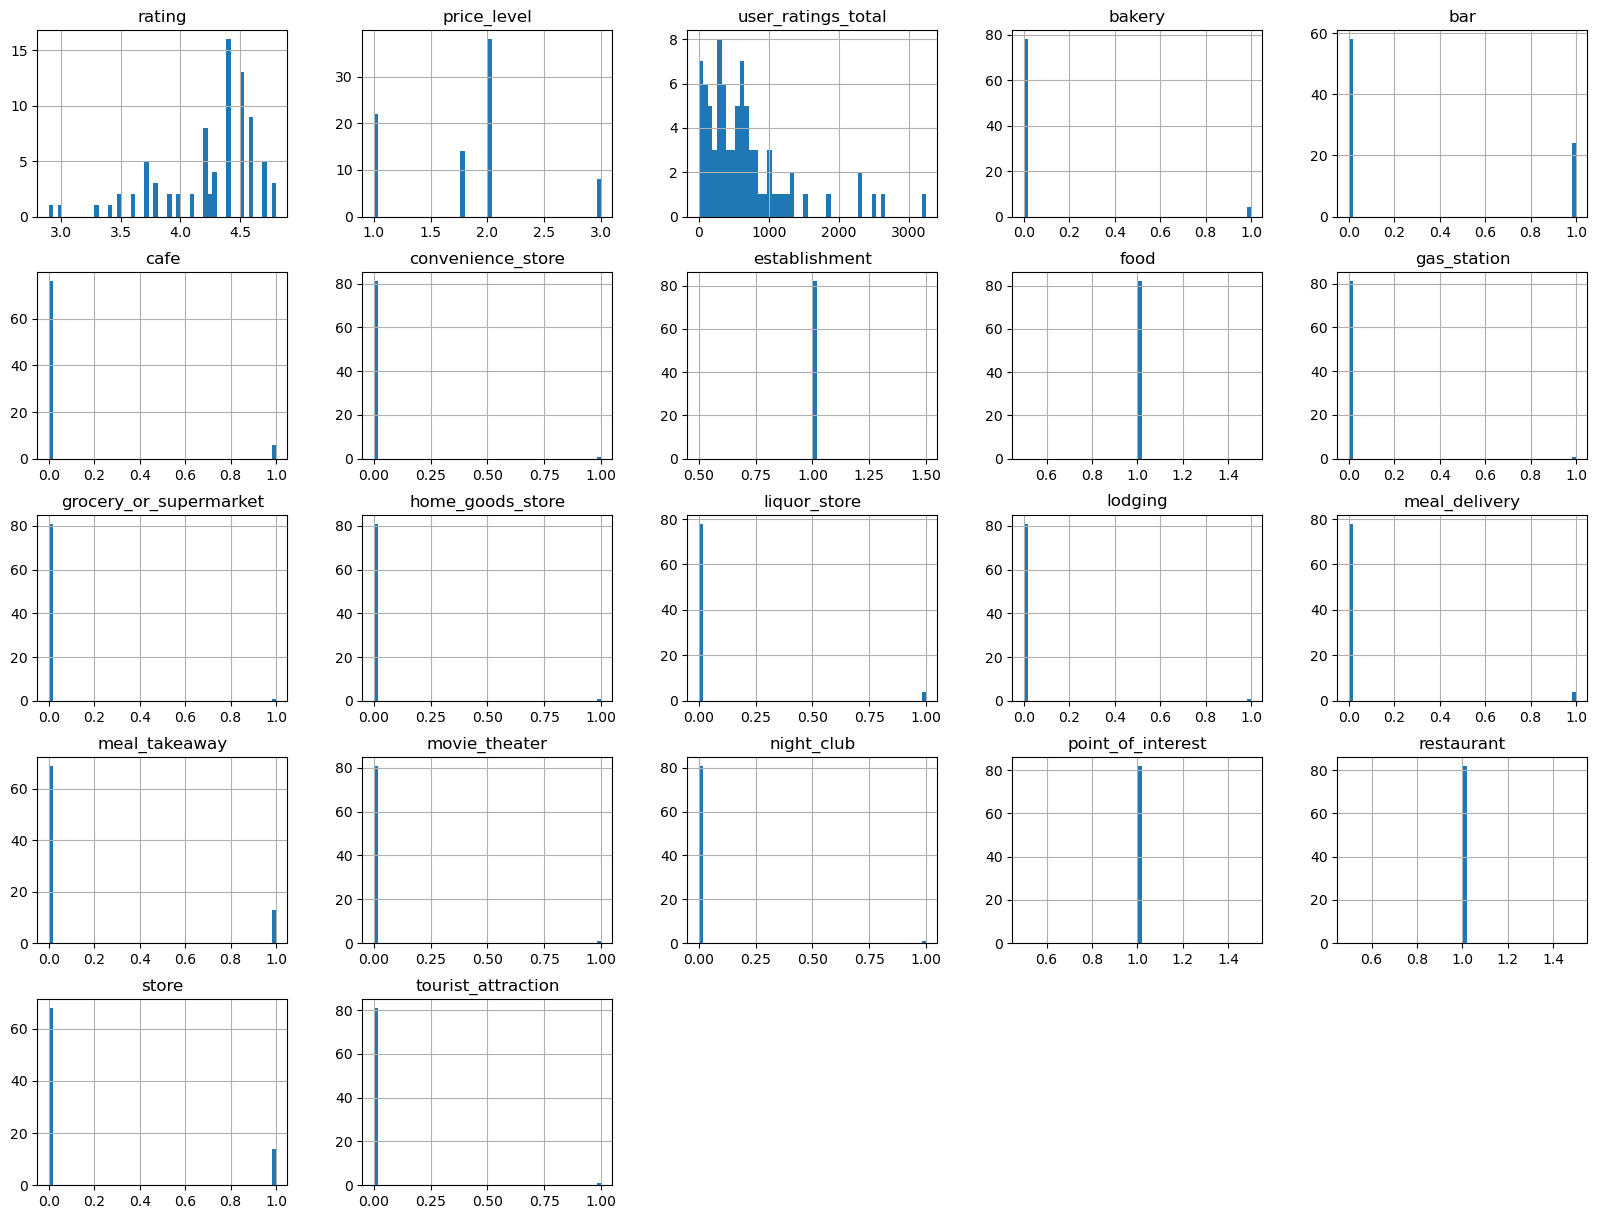

In [97]:
## Plot desnity plot for all features
#plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [100]:
df.to_csv("c.csv",index=False)

In [101]:
df.isnull().sum()

rating                    0
price_level               0
user_ratings_total        0
bakery                    0
bar                       0
cafe                      0
convenience_store         0
establishment             0
food                      0
gas_station               0
grocery_or_supermarket    0
home_goods_store          0
liquor_store              0
lodging                   0
meal_delivery             0
meal_takeaway             0
movie_theater             0
night_club                0
point_of_interest         0
restaurant                0
store                     0
tourist_attraction        0
dtype: int64